Closing Price Data:
              Open     High     Low   Close  Adjusted Close    Volume  \
Date                                                                    
2024-11-14  179.75  180.445  176.03  177.35          177.35  17925763   
2024-11-13  182.15  182.615  180.12  180.49          180.49  13969709   
2024-11-12  181.38  184.025  180.99  183.32          183.32  14065845   
2024-11-11  180.07  182.085  179.99  181.97          181.97  12503422   
2024-11-08  182.00  182.350  179.57  179.86          179.86  15021549   

            Dividend Amount  Split Coefficient  
Date                                            
2024-11-14              0.0                1.0  
2024-11-13              0.0                1.0  
2024-11-12              0.0                1.0  
2024-11-11              0.0                1.0  
2024-11-08              0.0                1.0  


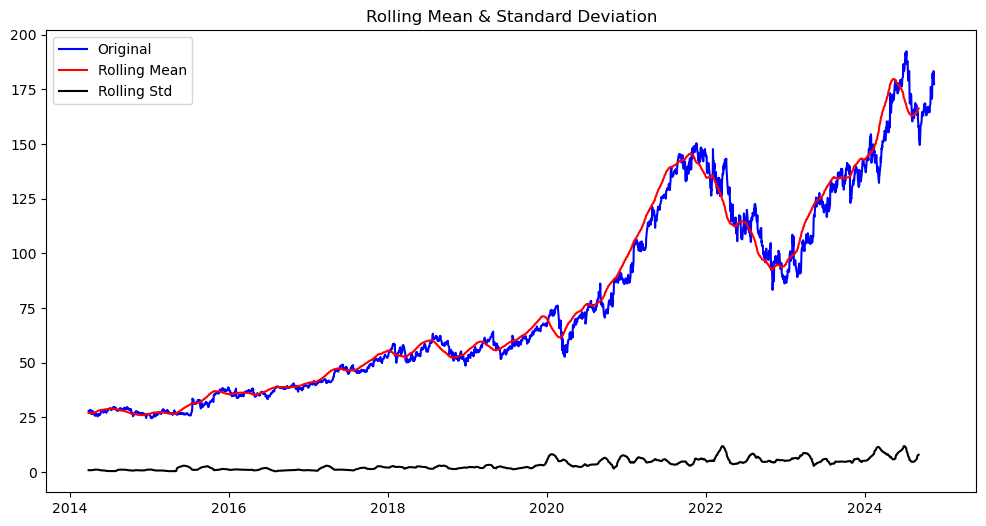

Test Statistic                   -1.754383
p-value                           0.403333
#Lags Used                       24.000000
Number of Observations Used    2654.000000
Critical Value (1%)              -3.432816
Critical Value (5%)              -2.862630
Critical Value (10%)             -2.567350
dtype: float64


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.10301D+00    |proj g|=  1.36343D-01


 This problem is unconstrained.



At iterate    5    f=  2.00547D+00    |proj g|=  4.00759D-02

At iterate   10    f=  1.99458D+00    |proj g|=  2.89744D-03

At iterate   15    f=  1.99345D+00    |proj g|=  2.43149D-03

At iterate   20    f=  1.99340D+00    |proj g|=  1.52081D-04

At iterate   25    f=  1.99335D+00    |proj g|=  1.92286D-03

At iterate   30    f=  1.99334D+00    |proj g|=  5.51313D-04

At iterate   35    f=  1.99333D+00    |proj g|=  2.69577D-04

At iterate   40    f=  1.99333D+00    |proj g|=  6.10535D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     48      1     0     0   1.259D-05   1.993D+00
  F =   1.99333145867

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


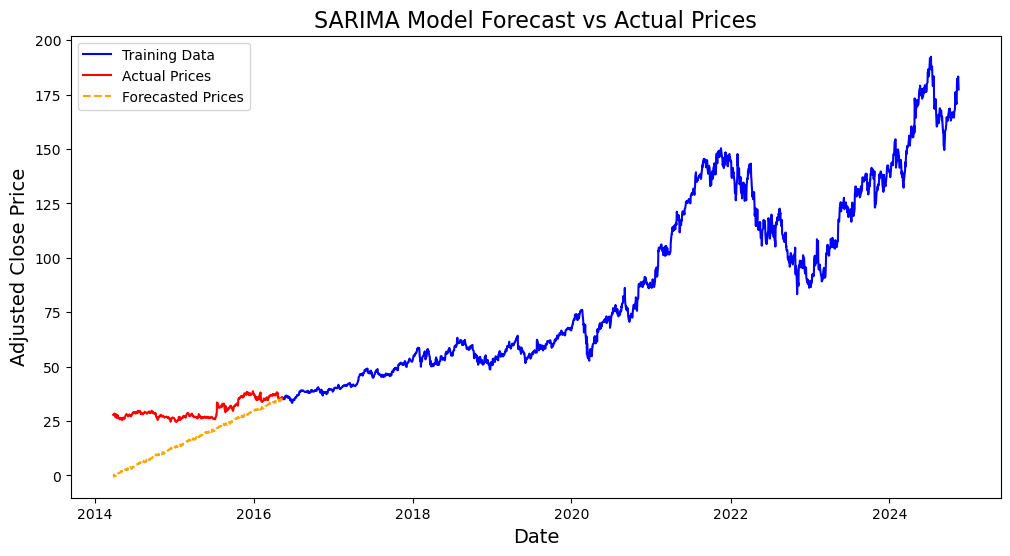

Testing Mean Squared Error (SARIMA): 213.881


In [52]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

# Load the closing price data
stock = "GOOG"
df_closing = pd.read_csv(f'/Users/sunithakosireddy/Downloads/data/{stock}_daily_adjusted.csv', 
                          header=0, index_col=0, parse_dates=[0], thousands=',')

# Print the first few rows 
print("Closing Price Data:")
print(df_closing.head())

# Use 'Adjusted Close' for analysis
ts = df_closing['Adjusted Close'].dropna()

# Check for stationarity
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=52).mean()
    rolstd = timeseries.rolling(window=52).std()
    
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    # Perform the Dickey-Fuller test
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

test_stationarity(ts)

# Split the data into training (80%) and testing (20%)
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

# Fit the SARIMA model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))  # Adjust parameters as necessary
model_fit = model.fit()

# Forecasting the next periods
forecast = model_fit.forecast(steps=len(test))

# Plotting the actual vs forecasted prices
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Actual Prices', color='red')
plt.plot(test.index, forecast, label='Forecasted Prices', color='orange', linestyle='dashed')
plt.title('SARIMA Model Forecast vs Actual Prices', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.legend()
plt.show()

# Calculate and print the Mean Squared Error (MSE) for SARIMA
mse_sarima = mean_squared_error(test, forecast)
print(f'Testing Mean Squared Error (SARIMA): {mse_sarima:.3f}')

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0836   
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019 
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016     
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012     
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015 
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013 
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011     
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012     
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013 
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011     
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013     
Epoch 15/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3m

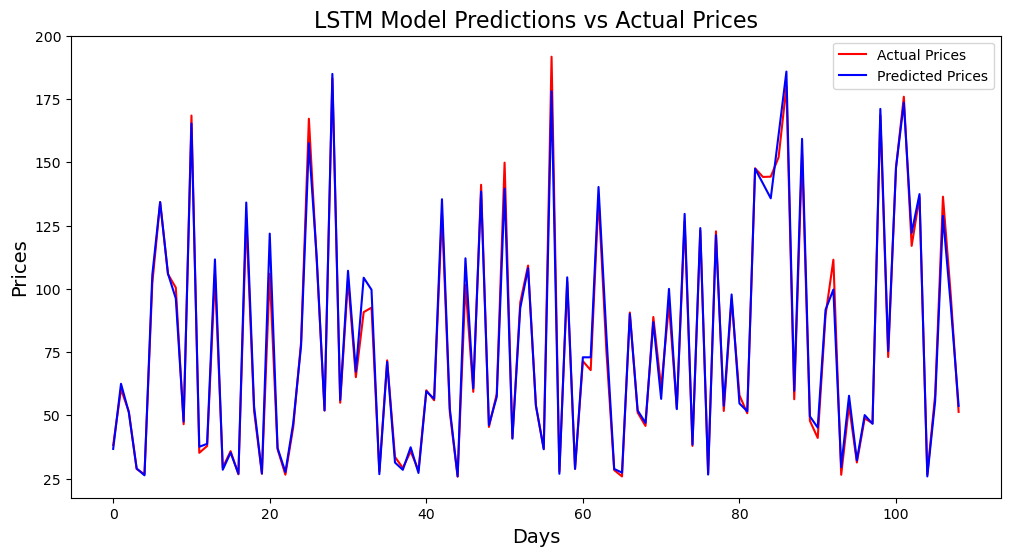

In [65]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assume we have time series data for stock prices
# Use 'Adjusted Close' 
df_stock = pd.read_csv(f'/Users/sunithakosireddy/Downloads/data/{stock}_weekly_adjusted.csv', header=0, index_col=0, parse_dates=[0], thousands=',')
ts = df_stock['Adjusted Close'].values

# Use the 'Adjusted Close' prices for analysis
ts = df_stock['Adjusted Close'].values

# Normalize the actual prices
scaler = MinMaxScaler()
ts = ts.reshape(-1, 1)  # Reshape for scaler
ts_scaled = scaler.fit_transform(ts)

# Define a function to create sequences of data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Set time step for LSTM
time_step = 10  # Number of previous days to use for predicting the next day
X, y = create_dataset(ts_scaled, time_step)

# Reshape input for LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(tf.keras.layers.LSTM(50, return_sequences=False))
model.add(tf.keras.layers.Dense(25))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X_train, y_train, batch_size=32, epochs=100)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform to get the original scale for predicted prices
predictions = scaler.inverse_transform(predictions)

# Inverse transform actual test prices
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_scaled, label='Actual Prices', color='red')
plt.plot(predictions, label='Predicted Prices', color='blue')
plt.title('LSTM Model Predictions vs Actual Prices', fontsize=16)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Prices', fontsize=14)
plt.legend()
plt.show()

Trial 10 Complete [00h 00m 04s]
val_loss: 0.17858174443244934

Best val_loss So Far: 2.8857291908934712e-05
Total elapsed time: 00h 00m 35s
Best Hyperparameters: {'units_1': 112, 'units_2': 48, 'dropout': 0.2, 'learning_rate': 0.0004709657856706372}
Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1209 - val_loss: 1.8669e-04
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0776 - val_loss: 3.0321e-05
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0437 - val_loss: 2.2136e-05
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0530 - val_loss: 1.1849e-04
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0850 - val_loss: 3.8986e-04
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0609 - val_loss: 9.1002e-04
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0438 - val_loss: 9.9688e-04
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0529 - val_loss: 0.0012
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0527 - val_loss: 8.6573e-04
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0493 - val_loss: 6.8903e-04
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0613 - val_loss: 0.0013
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

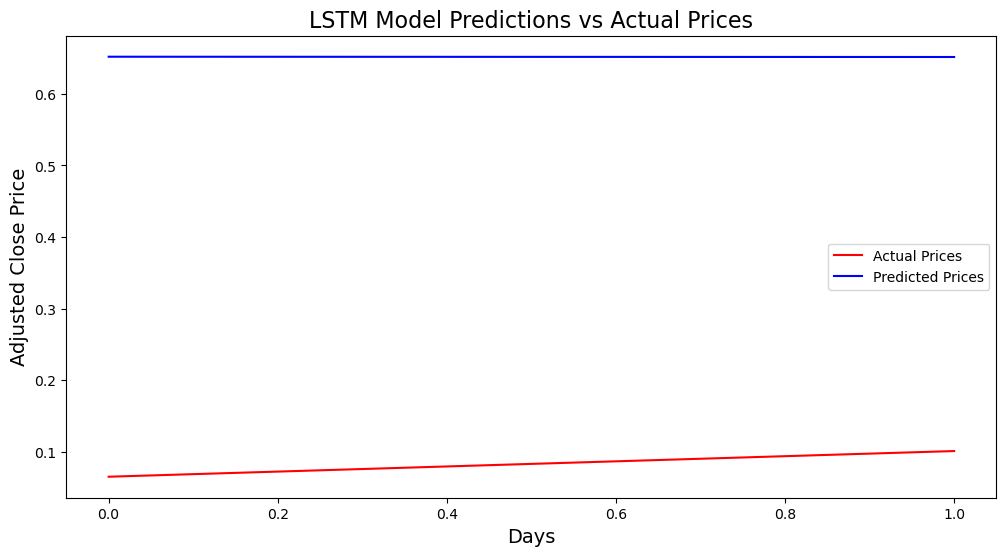

Testing Mean Squared Error (Best LSTM Model): 0.324


In [186]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load weekly price data from CSV file
stock = "GOOG"  # Change to the desired stock symbol
file_path_price = f'/Users/sunithakosireddy/Downloads/data/{stock}_weekly_adjusted.csv'
file_path_earnings = f'/Users/sunithakosireddy/Downloads/data/{stock}_earnings.csv'  # Path to earnings data

# Load price and earnings data
df_stock = pd.read_csv(file_path_price, header=0, index_col=0, parse_dates=[0], thousands=',')
df_earnings = pd.read_csv(file_path_earnings, header=0, index_col=0, parse_dates=[0], thousands=',')

# Combine the dataframes into one 
merged_df = df_stock.join(df_earnings['surprisePercentage'], how='outer')

# Drop rows with any missing values
merged_df.dropna(inplace=True)

# Using 'Adjusted Close' price and 'surprisePercentage' for analysis
data = merged_df[['Adjusted Close', 'surprisePercentage']].values

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)



# Define a function to create sequences of data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), :])  # Use all features
        y.append(data[i + time_step, 0])      # Predicting the 'Adjusted Close'
    return np.array(X), np.array(y)

# Set time step for LSTM
time_step = 2  # Number of previous weeks to

# Create dataset sequences
X, y = create_dataset(data_scaled, time_step)


# Reshape input for LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the training data
scaler = MinMaxScaler()
X_train_reshaped = X_train.reshape(-1, X_train.shape[2])  # Reshape for scaler
X_train_scaled = scaler.fit_transform(X_train_reshaped).reshape(X_train.shape)  # Fit and transform

# Normalize the test data using the same scaler
X_test_reshaped = X_test.reshape(-1, X_test.shape[2])  # Reshape for scaler
X_test_scaled = scaler.transform(X_test_reshaped).reshape(X_test.shape)

# Ensure shapes are correct for LSTM
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

# Define a function to build the model
def build_model(hyperparameters):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))  # Input layer
    model.add(tf.keras.layers.LSTM(units=hyperparameters.Int('units_1', min_value=32, max_value=128, step=16),
                                    return_sequences=True))
    model.add(tf.keras.layers.LSTM(units=hyperparameters.Int('units_2', min_value=32, max_value=128, step=16),
                                    return_sequences=False))
    model.add(tf.keras.layers.Dropout(hyperparameters.Float('dropout', 0.0, 0.5, step=0.1)))
    model.add(tf.keras.layers.Dense(25))
    model.add(tf.keras.layers.Dense(1))  # Output layer for predicting 'Adjusted Close'

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(
        learning_rate=hyperparameters.Float('learning_rate', 1e-5, 1e-2, sampling='LOG')),
        loss='mean_squared_error'
    )
    
    return model

# Instantiate the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # Increase for a more thorough search
    executions_per_trial=1,
    directory='/Users/sunithakosireddy/Downloads/tuner1',  # Update directory to avoid conflicts
    project_name='stock_price_prediction'
)

# Split training set further for validation
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Search for the best hyperparameters
tuner.search(X_train_final, y_train_final, epochs=50, validation_data=(X_val, y_val), verbose=1)

# Get the best hyperparameters and model
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hyperparameters.values}")

# Build the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Fit the best model on the full training data
best_model.fit(X_train_scaled, y_train, batch_size=1, epochs=100, validation_data=(X_val, y_val), verbose=1)

# Make predictions on the test data
predictions = best_model.predict(X_test_scaled)

# Prepare an array with the same number of features used in scaling
predictions_combined = np.concatenate((predictions, np.zeros((predictions.shape[0], 1))), axis=1)  # Extend with zeros

# Inverse transform to get the original scale for predicted prices
predictions_rescaled = scaler.inverse_transform(predictions_combined)[:, 0]  # Take only the first column 

# Inverse transform actual test prices for comparison
y_test_combined = np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1))), axis=1)  # Prepare actuals
y_test_rescaled = scaler.inverse_transform(y_test_combined)[:, 0]  # Take only the first column

# Plotting the results
plt.figure(figsize=(12, 6))

plt.plot(y_test_rescaled, label='Actual Prices', color='red')
plt.plot(predictions_rescaled, label='Predicted Prices', color='blue')
plt.title('LSTM Model Predictions vs Actual Prices', fontsize=16)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.legend()
plt.show()

# Calculate and print the Mean Squared Error (MSE) for the model
mse_lstm = mean_squared_error(y_test_rescaled, predictions_rescaled)
print(f'Testing Mean Squared Error (Best LSTM Model): {mse_lstm:.3f}')

